C:\Users\jonat\AppData\Local\Temp\ipykernel_20160\1320122219.py:11: UserWarning: Parsing dates in %m-%d-%Y %H:%M format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["datetime"] = pd.to_datetime(df["date"] + " " + df["time"], dayfirst=True, errors="coerce")


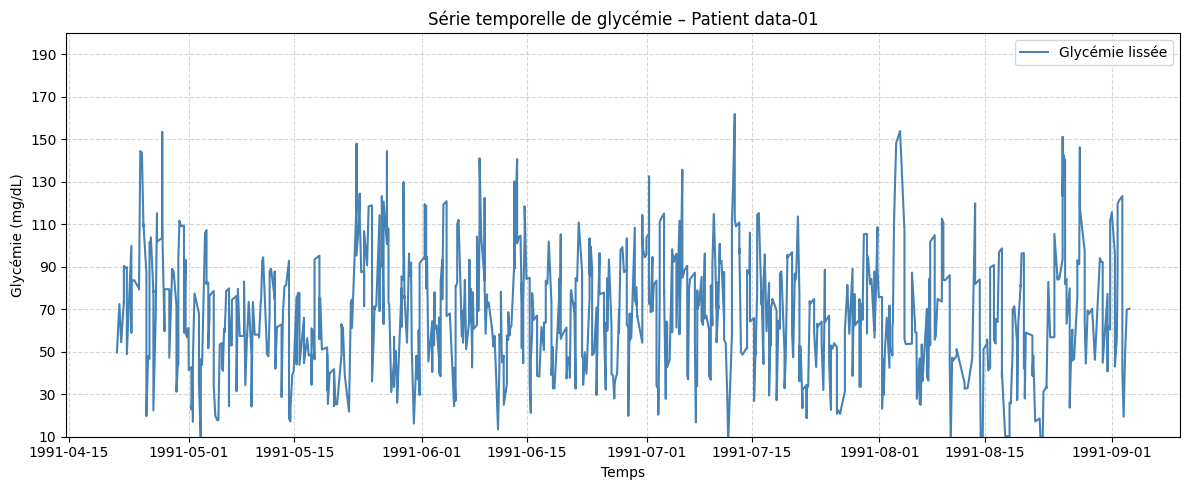

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier
df = pd.read_csv("diabetes_merged.csv", sep="," ,header=0)

# Renommer les colonnes pour plus de clarté
df.columns = ["date", "time", "code", "glucose", "source"]

# Fusionner date + time en datetime, en forçant dayfirst et en gérant les erreurs
df["datetime"] = pd.to_datetime(df["date"] + " " + df["time"], dayfirst=True, errors="coerce")

# Supprimer les lignes avec datetime invalide
df = df.dropna(subset=["datetime"])

# Trier par ordre chronologique
df = df.sort_values("datetime")

# Filtrer le patient (ici data-01)
plt.figure(figsize=(12, 5))
plt.plot(df_patient["datetime"], df_patient["glucose_smooth"], label="Glycémie lissée", color="steelblue")

plt.title("Série temporelle de glycémie – Patient data-01")
plt.xlabel("Temps")
plt.ylabel("Glycémie (mg/dL)")

plt.ylim(10, 200)
plt.yticks(range(10,200, 20))
plt.tick_params(axis='y', labelsize=10)

plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()
